In [3]:
#import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#importing the dataset
dataset=pd.read_csv("C:/Users/91830/Downloads/Fraud.csv")

In [5]:
dataset.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
#Data cleaning
dataset.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [8]:
dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
dataset.shape

(6362620, 11)

In [10]:
dataset['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [11]:
dataset['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [12]:
dataset.replace(to_replace=["CASH_OUT","PAYMENT","CASH_IN","TRANSFER","DEBIT"],value=[1,2,3,4,5],inplace=True)

C:\Users\91830\AppData\Local\Temp\ipykernel_11808\749889108.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace(to_replace=["CASH_OUT","PAYMENT","CASH_IN","TRANSFER","DEBIT"],value=[1,2,3,4,5],inplace=True)


In [13]:
dataset['type'].unique()

array([2, 4, 1, 5, 3], dtype=int64)

In [14]:
dataset.drop(["nameOrig","nameDest"],axis=1,inplace=True)

In [15]:
dataset.tail()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,1,339682.13,339682.13,0.0,0.00,339682.13,1,0
6362616,743,4,6311409.28,6311409.28,0.0,0.00,0.00,1,0
6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0
6362618,743,4,850002.52,850002.52,0.0,0.00,0.00,1,0
6362619,743,1,850002.52,850002.52,0.0,6510099.11,7360101.63,1,0


In [16]:
dataset.corr()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.012627,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
type,0.012627,1.000000,0.198987,0.260418,0.270669,0.066255,0.079111,0.016171,0.003144
amount,0.022373,0.198987,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,0.260418,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,0.270669,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.066255,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.079111,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.016171,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.003144,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [17]:
#Outliers
sorted(dataset)

['amount',
 'isFlaggedFraud',
 'isFraud',
 'newbalanceDest',
 'newbalanceOrig',
 'oldbalanceDest',
 'oldbalanceOrg',
 'step',
 'type']

In [18]:
quantile1,quantile3=np.percentile(dataset,[25,75])
print(quantile1,quantile3)

0.0 65909.71


In [19]:
iqr_value=quantile3-quantile1
print(iqr_value)

65909.71


In [20]:
#lower bound & upper bound values
lower_bound_value=quantile1-(1.5*iqr_value)
upper_bound_value=quantile3+(1.5*iqr_value)

In [21]:
print(lower_bound_value,upper_bound_value)

-98864.565 164774.27500000002


In [22]:
#Multi-collinearity
import statsmodels.api as sm

In [23]:
x=dataset[["oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]]
y=dataset[["isFraud"]]
x=sm.add_constant(x)

In [24]:
x

,const,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1.0,170136.00,160296.36,0.00,0.00
1,1.0,21249.00,19384.72,0.00,0.00
2,1.0,181.00,0.00,0.00,0.00
3,1.0,181.00,0.00,21182.00,0.00
4,1.0,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...
6362615,1.0,339682.13,0.00,0.00,339682.13
6362616,1.0,6311409.28,0.00,0.00,0.00
6362617,1.0,6311409.28,0.00,68488.84,6379898.11
6362618,1.0,850002.52,0.00,0.00,0.00


In [25]:
model=sm.OLS(y,x).fit()

In [26]:
x.iloc[:,1:].corr()

,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
oldbalanceOrg,1.000000,0.998803,0.066243,0.042029
newbalanceOrig,0.998803,1.000000,0.067812,0.041837
oldbalanceDest,0.066243,0.067812,1.000000,0.976569
newbalanceDest,0.042029,0.041837,0.976569,1.000000


In [27]:
#Fraud detection models

x=dataset.drop(["isFraud","isFlaggedFraud"],axis=1)
y=dataset["isFraud"]

In [28]:
#split the data in train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\91830\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_predict=logmodel.predict(x_test)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096999
           1       0.37      0.44      0.40      2666

    accuracy                           1.00   2099665
   macro avg       0.68      0.72      0.70   2099665
weighted avg       1.00      1.00      1.00   2099665



In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[2095017,    1982],
       [   1502,    1164]], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.99834068768113

In [35]:
#model performance
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test and y_pred are the true and predicted labels respectively
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Precision:  0.36999364272091545
Recall:  0.436609152288072
F1-score:  0.4005505849965588


In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
y_predict=decision_tree.predict(x_test)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096999
           1       0.89      0.88      0.89      2666

    accuracy                           1.00   2099665
   macro avg       0.95      0.94      0.94   2099665
weighted avg       1.00      1.00      1.00   2099665



In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[2096720,     279],
       [    328,    2338]], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9997109062636182

In [42]:
#model performance
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_true and y_pred are the true and predicted labels respectively
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Precision:  0.8933893771494077
Recall:  0.8769692423105776
F1-score:  0.8851031610827181


<Axes: >

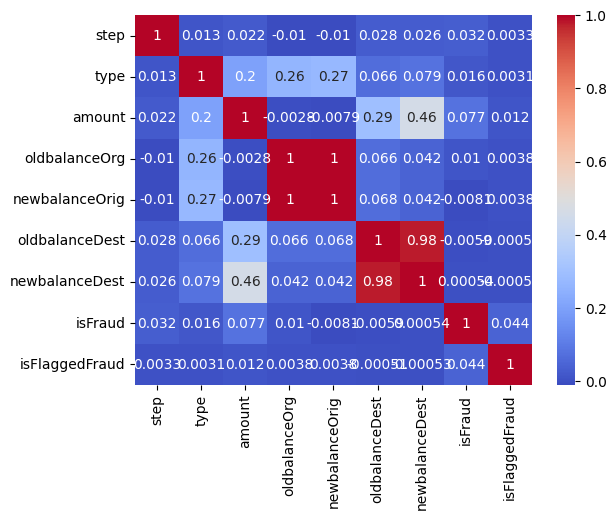

In [43]:
#variable selection
import seaborn as sns
correlation_matrix=dataset.corr()

sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')